In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log as lg

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 77034 (delta 37), reused 60 (delta 11), pack-reused 76918
Receiving objects: 100% (77034/77034), 637.03 MiB | 29.86 MiB/s, done.
Resolving deltas: 100% (51556/51556), done.
Checking out files: 100% (810/810), done.


In [3]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us

04-12-2020.csv	06-02-2020.csv	07-23-2020.csv	09-12-2020.csv	11-02-2020.csv
04-13-2020.csv	06-03-2020.csv	07-24-2020.csv	09-13-2020.csv	11-03-2020.csv
04-14-2020.csv	06-04-2020.csv	07-25-2020.csv	09-14-2020.csv	11-04-2020.csv
04-15-2020.csv	06-05-2020.csv	07-26-2020.csv	09-15-2020.csv	11-05-2020.csv
04-16-2020.csv	06-06-2020.csv	07-27-2020.csv	09-16-2020.csv	11-06-2020.csv
04-17-2020.csv	06-07-2020.csv	07-28-2020.csv	09-17-2020.csv	11-07-2020.csv
04-18-2020.csv	06-08-2020.csv	07-29-2020.csv	09-18-2020.csv	11-08-2020.csv
04-19-2020.csv	06-09-2020.csv	07-30-2020.csv	09-19-2020.csv	11-09-2020.csv
04-20-2020.csv	06-10-2020.csv	07-31-2020.csv	09-20-2020.csv	11-10-2020.csv
04-21-2020.csv	06-11-2020.csv	08-01-2020.csv	09-21-2020.csv	11-11-2020.csv
04-22-2020.csv	06-12-2020.csv	08-02-2020.csv	09-22-2020.csv	11-12-2020.csv
04-23-2020.csv	06-13-2020.csv	08-03-2020.csv	09-23-2020.csv	11-13-2020.csv
04-24-2020.csv	06-14-2020.csv	08-04-2020.csv	09-24-2020.csv	11-14-2020.csv
04-25-2020.csv	06-15-2020

In [4]:
df_daily = pd.DataFrame()
for i in range(1, 13):
  if i < 10:
    month = '0' + str(i)
  elif i >= 10:
    month = str(i)
  for p in range(1, 33):
    if p < 10:
      day = '0' + str(p)
    elif p >= 10:
      day = str(p)
    try:
      df_hold = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/' + month + '-' + day + '-2020.csv')
      df_daily = pd.concat([df_daily, df_hold])
    except: FileNotFoundError
      

In [5]:
display(df_daily.shape)
df_daily.head()

(14518, 20)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945,NaN,NaN
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059,NaN,NaN
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN,NaN,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250,NaN,NaN
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176,NaN,NaN


In [6]:
df_daily['Province_State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'American Samoa', 'Northern Mariana Islands',
       'Recovered', 'Virgin Islands'], dtype=object)

In [7]:
df_daily.set_index("Province_State", inplace = True) 
tn_daily = df_daily.loc['Tennessee']
tn_daily.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio
Province_State,,,,,,,,,,,,,,,,,,,
Tennessee,US,2020-04-12 23:18:15,35.7478,-86.6923,5508,106,1504.0,5402.0,47.0,83.900374,70677.0,567.0,1.924473,84000047.0,USA,1076.584377,10.294118,NaN,NaN
Tennessee,US,2020-04-13 23:07:54,35.7478,-86.6923,5610,109,1671.0,5501.0,47.0,85.454085,76195.0,579.0,1.942959,84000047.0,USA,1160.637076,10.320856,NaN,NaN
Tennessee,US,2020-04-14 23:33:31,35.7478,-86.6923,5827,124,1969.0,5703.0,47.0,88.759528,78831.0,633.0,2.128025,84000047.0,USA,1200.789833,10.863223,NaN,NaN
Tennessee,US,2020-04-15 22:56:51,35.7478,-86.6923,5827,124,2196.0,5703.0,47.0,88.759528,80896.0,663.0,2.128025,84000047.0,USA,1232.244857,11.378068,NaN,NaN
Tennessee,US,2020-04-16 23:30:51,35.7478,-86.6923,6375,136,2786.0,6239.0,47.0,97.106915,85049.0,691.0,2.133333,84000047.0,USA,1295.505252,10.839216,NaN,NaN


In [8]:
plt.style.use('bmh')

In [9]:
tn_daily['Days_Tracked'] = range(1, len(tn_daily)+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
tn_daily[['Date','Time_Reported']] = tn_daily.Last_Update.str.split(expand=True)
tn_daily.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio,Days_Tracked,Date,Time_Reported
Province_State,,,,,,,,,,,,,,,,,,,,,,
Tennessee,US,2020-04-12 23:18:15,35.7478,-86.6923,5508,106,1504.0,5402.0,47.0,83.900374,70677.0,567.0,1.924473,84000047.0,USA,1076.584377,10.294118,NaN,NaN,1,2020-04-12,23:18:15
Tennessee,US,2020-04-13 23:07:54,35.7478,-86.6923,5610,109,1671.0,5501.0,47.0,85.454085,76195.0,579.0,1.942959,84000047.0,USA,1160.637076,10.320856,NaN,NaN,2,2020-04-13,23:07:54
Tennessee,US,2020-04-14 23:33:31,35.7478,-86.6923,5827,124,1969.0,5703.0,47.0,88.759528,78831.0,633.0,2.128025,84000047.0,USA,1200.789833,10.863223,NaN,NaN,3,2020-04-14,23:33:31
Tennessee,US,2020-04-15 22:56:51,35.7478,-86.6923,5827,124,2196.0,5703.0,47.0,88.759528,80896.0,663.0,2.128025,84000047.0,USA,1232.244857,11.378068,NaN,NaN,4,2020-04-15,22:56:51
Tennessee,US,2020-04-16 23:30:51,35.7478,-86.6923,6375,136,2786.0,6239.0,47.0,97.106915,85049.0,691.0,2.133333,84000047.0,USA,1295.505252,10.839216,NaN,NaN,5,2020-04-16,23:30:51


In [11]:
tn_daily['Date'] = pd.to_datetime(tn_daily['Date'], infer_datetime_format=True)
tn_daily.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio,Days_Tracked,Date,Time_Reported
Province_State,,,,,,,,,,,,,,,,,,,,,,
Tennessee,US,2020-04-12 23:18:15,35.7478,-86.6923,5508,106,1504.0,5402.0,47.0,83.900374,70677.0,567.0,1.924473,84000047.0,USA,1076.584377,10.294118,NaN,NaN,1,2020-04-12,23:18:15
Tennessee,US,2020-04-13 23:07:54,35.7478,-86.6923,5610,109,1671.0,5501.0,47.0,85.454085,76195.0,579.0,1.942959,84000047.0,USA,1160.637076,10.320856,NaN,NaN,2,2020-04-13,23:07:54
Tennessee,US,2020-04-14 23:33:31,35.7478,-86.6923,5827,124,1969.0,5703.0,47.0,88.759528,78831.0,633.0,2.128025,84000047.0,USA,1200.789833,10.863223,NaN,NaN,3,2020-04-14,23:33:31


In [12]:
from bokeh.io import output_notebook, output_file, save, show
from bokeh.plotting import figure, show
from bokeh.models import LabelSet, ColumnDataSource

source = ColumnDataSource(data=dict(Date=tn_daily['Date'],
                                    Active=tn_daily['Active'],
                                    names=tn_daily['Active']))

output_notebook()
# output_file('interactive_viz.html')
fig = figure(title='Active Cases in Tennessee',
             plot_height=300, plot_width=400,
             x_axis_type='datetime'
             )

fig.line(x='Date',
         y='Active',
         color='maroon',
         line_width=2,
         source=source)

show(fig)

In [13]:
def build_plots(df, x, y, y2=None):
  plt.plot(x, y, data=df, label=y, linewidth=3)
  if y2 != None:
    plt.plot(x, y2, data=df, label=y2, linewidth=3)
  plt.plot()
    
  plt.xlabel(x, size=14)
  plt.xticks(rotation=30)
  plt.title("COVID-19 in Tennessee")
  plt.legend()
  return plt.show()

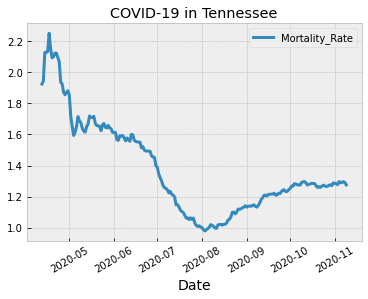

In [14]:
build_plots(tn_daily, 'Date', 'Mortality_Rate')

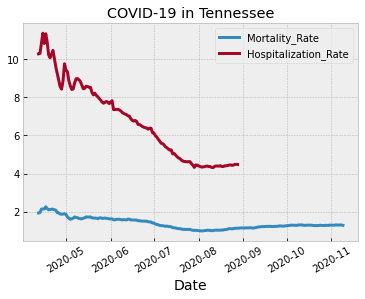

In [15]:
build_plots(tn_daily, 'Date', 'Mortality_Rate', 'Hospitalization_Rate')

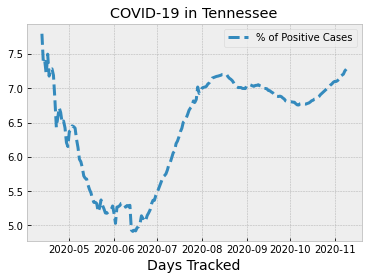

In [16]:
PctPos = (tn_daily['Confirmed'] / tn_daily['People_Tested']) * 100
plt.plot(tn_daily['Date'], PctPos, label='% of Positive Cases', 
         linewidth=3, linestyle='--')
plt.xlabel("Days Tracked", size=14)
plt.title("COVID-19 in Tennessee")
plt.legend()
plt.show()